In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

D:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
#Loading the data(cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

0


'non-cat'

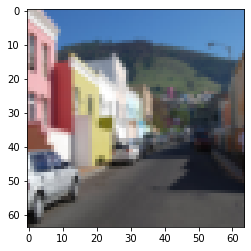

In [16]:
#example
plt.imshow(train_set_x_orig[1])
print(train_set_y[0][1])
classes[np.squeeze(train_set_y[:,1])].decode("utf-8")

In [17]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [21]:
# Reshape the training and test examples
train_x_flatten = train_set_x_orig.reshape((train_set_x_orig.shape[0],-1)).T
test_x_flatten = test_set_x_orig.reshape((test_set_x_orig.shape[0],-1)).T
print(train_x_flatten.shape)
print(train_set_y.shape)
print(test_x_flatten.shape)
print(test_set_y.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [22]:
#Standardize
train_x = train_x_flatten/255.0
test_x = test_x_flatten/255.0

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [63]:
def initialize_with_zero(dim):
    W,b = np.zeros((dim,1)), 0.
    
    assert(W.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return W, b

In [87]:
def forwardprop(W,b,X,Y):
    m = X.shape[1]
    Z = np.dot(W.T,X) + b
    A = sigmoid(Z)
    cost = -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/X.shape[1]
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    
    assert(dw.shape == W.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw":dw,
            "db":db}
    
    return grads, cost

In [88]:
W, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = forwardprop(W, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [95]:
def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = forwardprop(W,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        W = W - learning_rate*dw
        b = b - learning_rate*db
        if i%50==0:
            costs.append(cost)
        if print_cost and i%50==0:
            print("Cost after %i iterations is %f"%(i,cost))
    params = {"W":W,
             "b":b}
    grads = {"dw":dw,
            "db":db}

    return params, grads, costs

In [97]:
params, grads, costs = optimize(W,b,X,Y,num_iterations=200,learning_rate=0.009,print_cost=True)
print ("w = " + str(params["W"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print(costs)

Cost after 0 iterations is 0.567291
Cost after 50 iterations is 0.512305
Cost after 100 iterations is 0.504049
Cost after 150 iterations is 0.497355
w = [[-0.50210704]
 [-0.45298168]]
b = 2.0743870834610703
dw = [[ 0.0992157 ]
 [-0.02504474]]
db = -0.06213021590377116
[0.567290709077523, 0.512304968747083, 0.5040491592779401, 0.4973547729820059]


In [102]:
def predict(W,b,X):
    m = X.shape[1]
    Z = np.dot(W.T,X)+b
    Y_pred = np.zeros((1,m))
    A = sigmoid(Z)
    for i in range(A.shape[1]):
        Y_pred[0,i] = 1 if A[0,i]>0.5 else 0
        
    assert(Y_pred.shape==(1,X.shape[1]))
    
    return Y_pred

In [99]:
predict(W,b,X)

array([[1., 1.]])

In [124]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.01
         ,print_cost = True):
    W,b = initialize_with_zero(X_train.shape[0])
    params, grads, costs = optimize(W=W, b=b, X=X_train, Y=Y_train, num_iterations=num_iterations,
            learning_rate=learning_rate, print_cost=print_cost)
    Y_pred_test = predict(W=params["W"], b=params["b"], X=X_test)
    Y_pred_train = predict(W=params["W"], b=params["b"], X=X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_pred_test, 
         "Y_prediction_train" : Y_pred_train, 
         "w" : params["W"], 
         "b" : params["b"],
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [125]:
d = model(train_x, train_set_y, test_x, test_set_y)

Cost after 0 iterations is 0.693147
Cost after 50 iterations is 0.924185
Cost after 100 iterations is 0.823921
Cost after 150 iterations is 0.889588
Cost after 200 iterations is 0.418944
Cost after 250 iterations is 0.824284
Cost after 300 iterations is 0.617350
Cost after 350 iterations is 0.576802
Cost after 400 iterations is 0.522116
Cost after 450 iterations is 0.459313
Cost after 500 iterations is 0.387709
Cost after 550 iterations is 0.309745
Cost after 600 iterations is 0.236254
Cost after 650 iterations is 0.181419
Cost after 700 iterations is 0.154222
Cost after 750 iterations is 0.142225
Cost after 800 iterations is 0.135328
Cost after 850 iterations is 0.129844
Cost after 900 iterations is 0.124971
Cost after 950 iterations is 0.120546
train accuracy: 98.56459330143541 %
test accuracy: 70.0 %


In [126]:
d["w"]

array([[ 0.01165247],
       [-0.03063544],
       [-0.01379726],
       ...,
       [-0.01410052],
       [-0.03438882],
       [ 0.02640075]])

In [127]:
d["b"]

-0.0037696989524414718

In [111]:
d["Y_prediction_test"]

array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
        1., 0.]])

In [106]:
d["Y_prediction_train"]

array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [115]:
def model_modified(X_train, Y_train, X_test, Y_test, W, b, num_iterations = 1000, learning_rate=0.01,
                   print_cost = True):
    W,b = W,b
    params, grads, costs = optimize(W=W, b=b, X=X_train, Y=Y_train, num_iterations=num_iterations,
            learning_rate=learning_rate, print_cost=print_cost)
    Y_pred_test = predict(W=params["W"], b=params["b"], X=X_test)
    Y_pred_train = predict(W=params["W"], b=params["b"], X=X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_pred_test, 
         "Y_prediction_train" : Y_pred_train, 
         "w" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [134]:
d_m = model_modified(train_x, train_set_y, test_x, test_set_y, d["w"],d["b"],
                    learning_rate=0.004)

Cost after 0 iterations is 0.116478
Cost after 50 iterations is 0.114938
Cost after 100 iterations is 0.113441
Cost after 150 iterations is 0.111987
Cost after 200 iterations is 0.110572
Cost after 250 iterations is 0.109194
Cost after 300 iterations is 0.107852
Cost after 350 iterations is 0.106543
Cost after 400 iterations is 0.105267
Cost after 450 iterations is 0.104022
Cost after 500 iterations is 0.102807
Cost after 550 iterations is 0.101619
Cost after 600 iterations is 0.100459
Cost after 650 iterations is 0.099326
Cost after 700 iterations is 0.098217
Cost after 750 iterations is 0.097133
Cost after 800 iterations is 0.096072
Cost after 850 iterations is 0.095033
Cost after 900 iterations is 0.094017
Cost after 950 iterations is 0.093021
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %


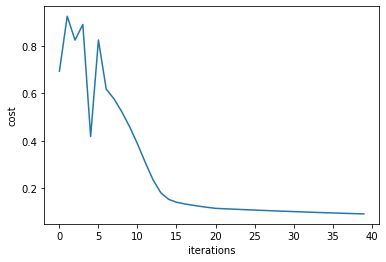

In [135]:
costs_line = d["costs"]+d_m["costs"]
plt.plot(costs_line)
plt.ylabel("cost")
plt.xlabel("iterations")
plt.show()